In [1]:
import os
import torch
from torchviz import make_dot
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

#### Build Models

In [2]:
from models.reg_model import REGModel
from models.config import Config

In [3]:
config = Config('visualization')
reg_model = REGModel(config)

#### Embedding Layer

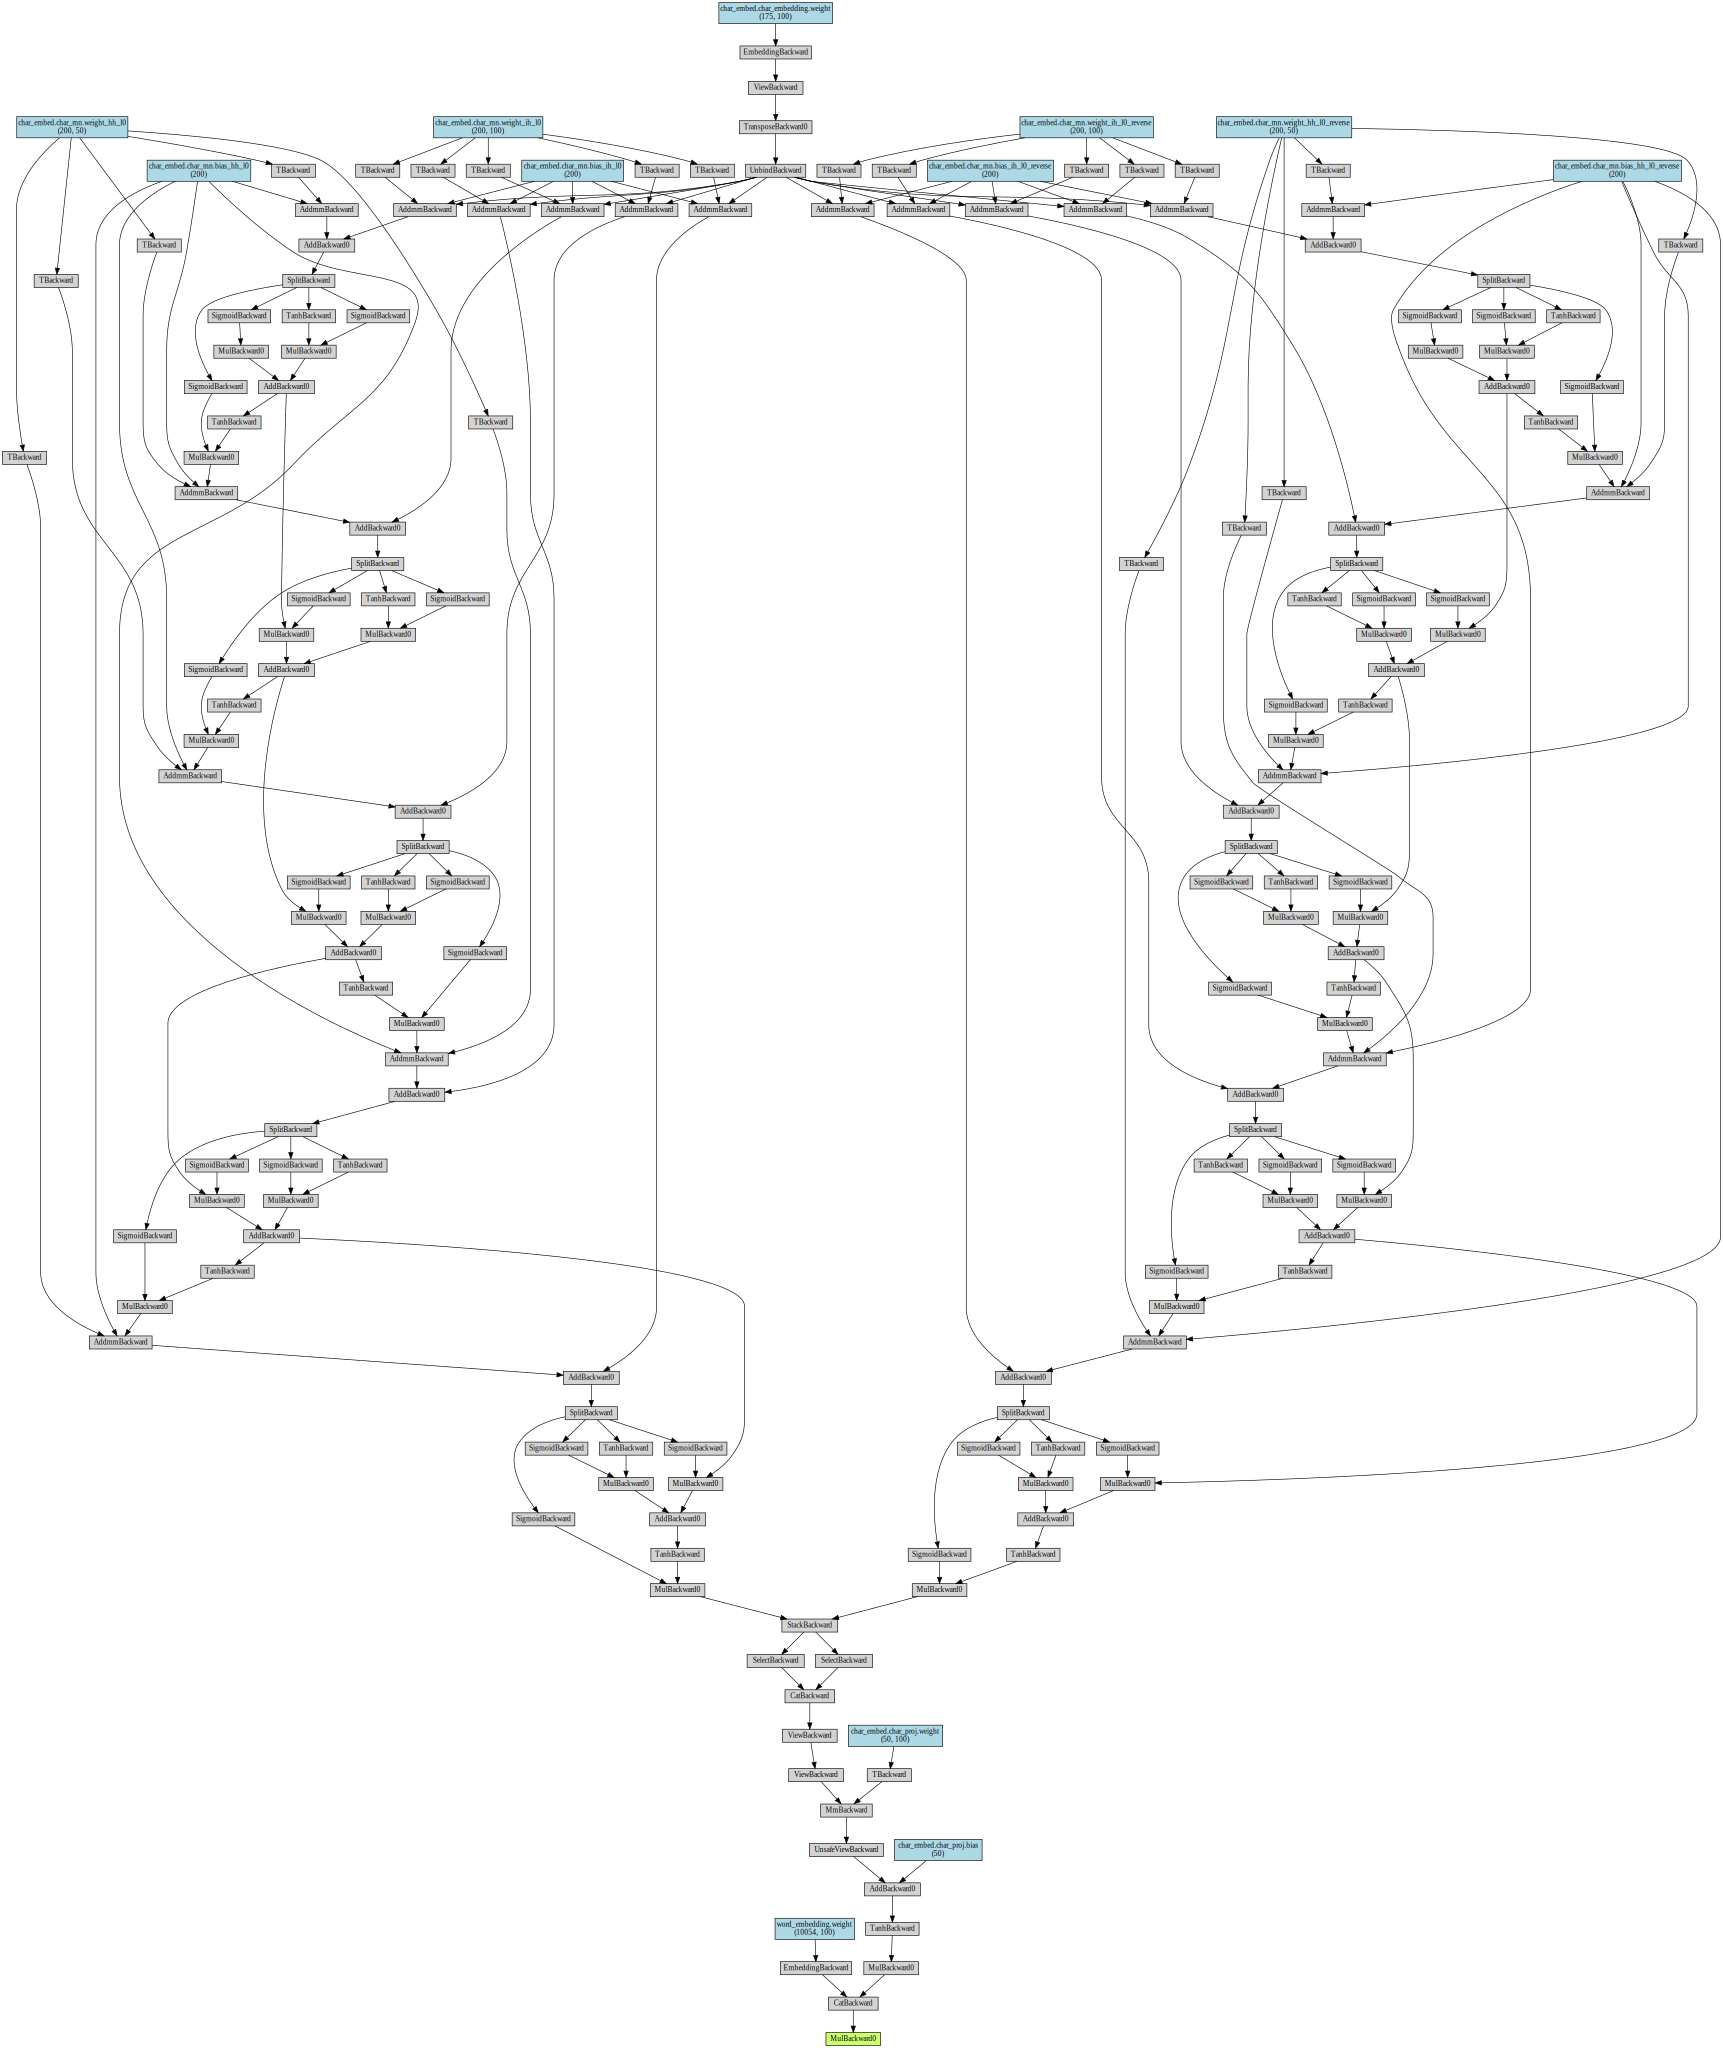

In [4]:
word_ids = torch.ones([10, 10], dtype=torch.long)
char_ids = torch.ones([10, 10, 5], dtype=torch.long)
word_lens = torch.ones([10, 10], dtype=torch.long)
                
make_dot(reg_model.wordEmbed(word_ids, char_ids, word_lens), params=dict(reg_model.wordEmbed.named_parameters()))

#### Context Encoder

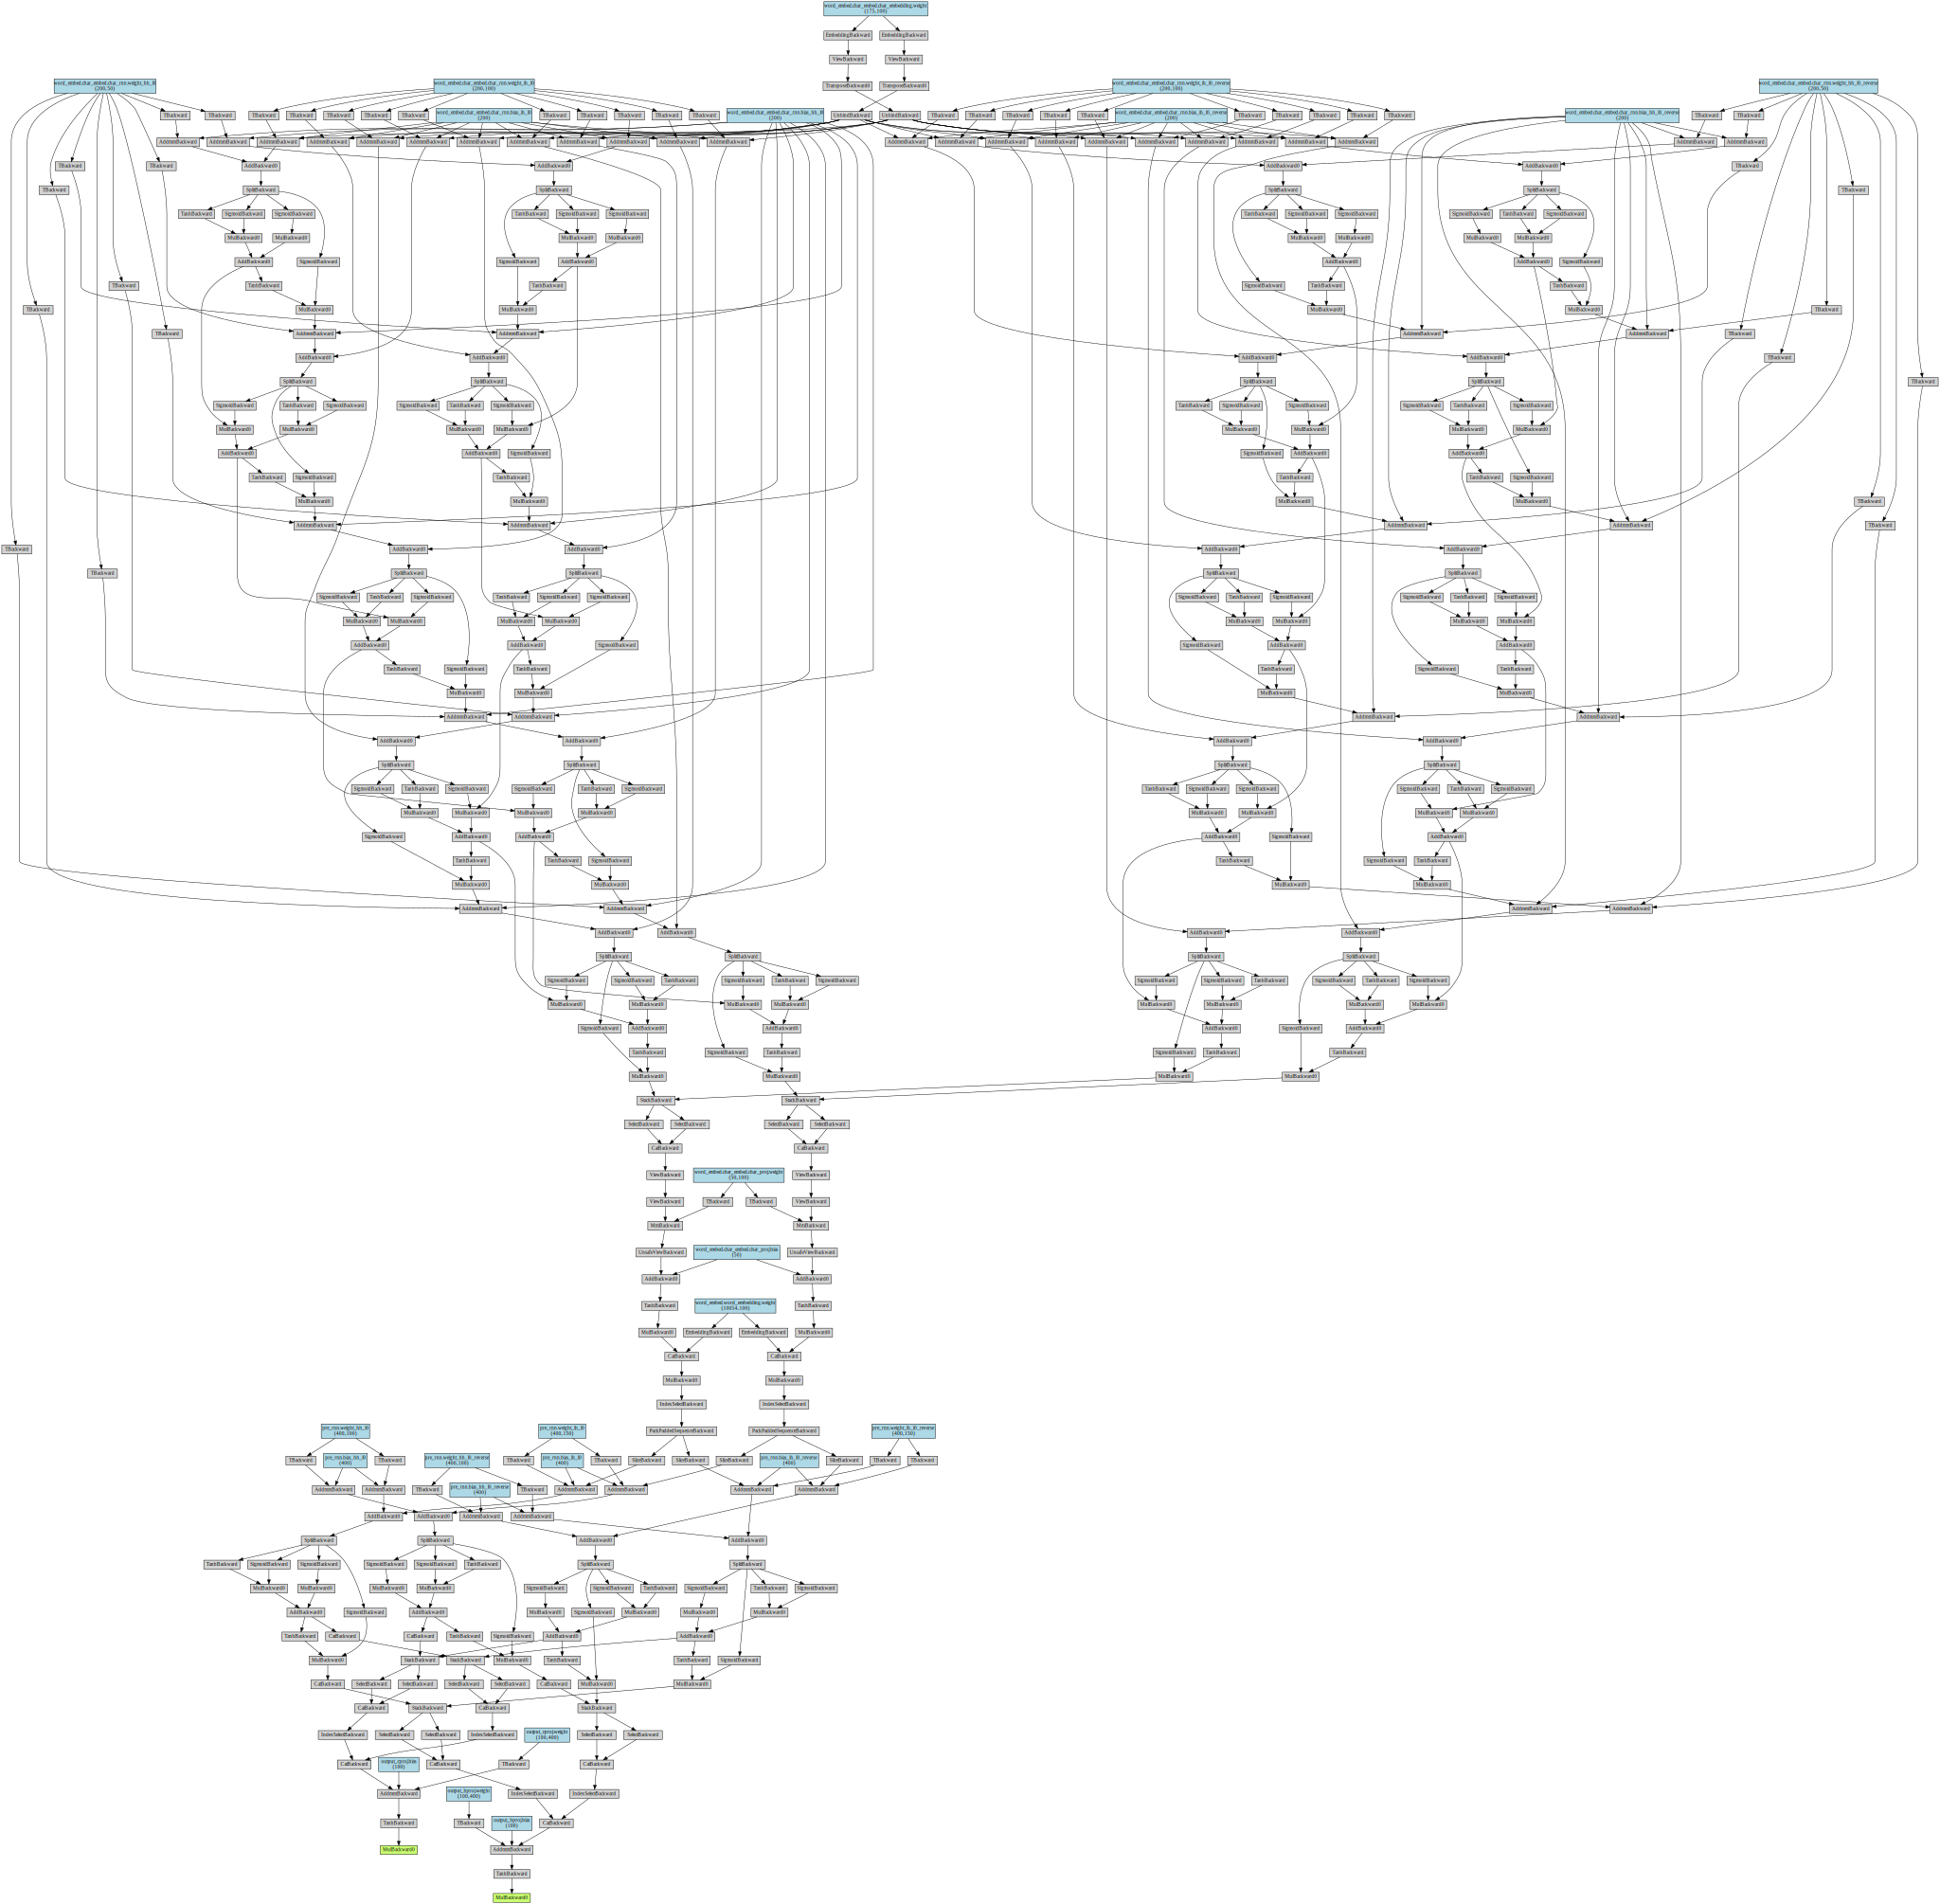

In [5]:
prec_word_ids = torch.ones([10, 10], dtype=torch.long)
prec_seq_lens = torch.ones([10], dtype=torch.long)
prec_char_ids = torch.ones([10, 10, 5], dtype=torch.long)
prec_word_lens = torch.ones([10, 10], dtype=torch.long)
_pre = (prec_word_ids, prec_seq_lens, prec_char_ids, prec_word_lens)

make_dot(reg_model.con_encoder(_pre, _pre), params=dict(reg_model.con_encoder.named_parameters()))

#### Profile Encoder

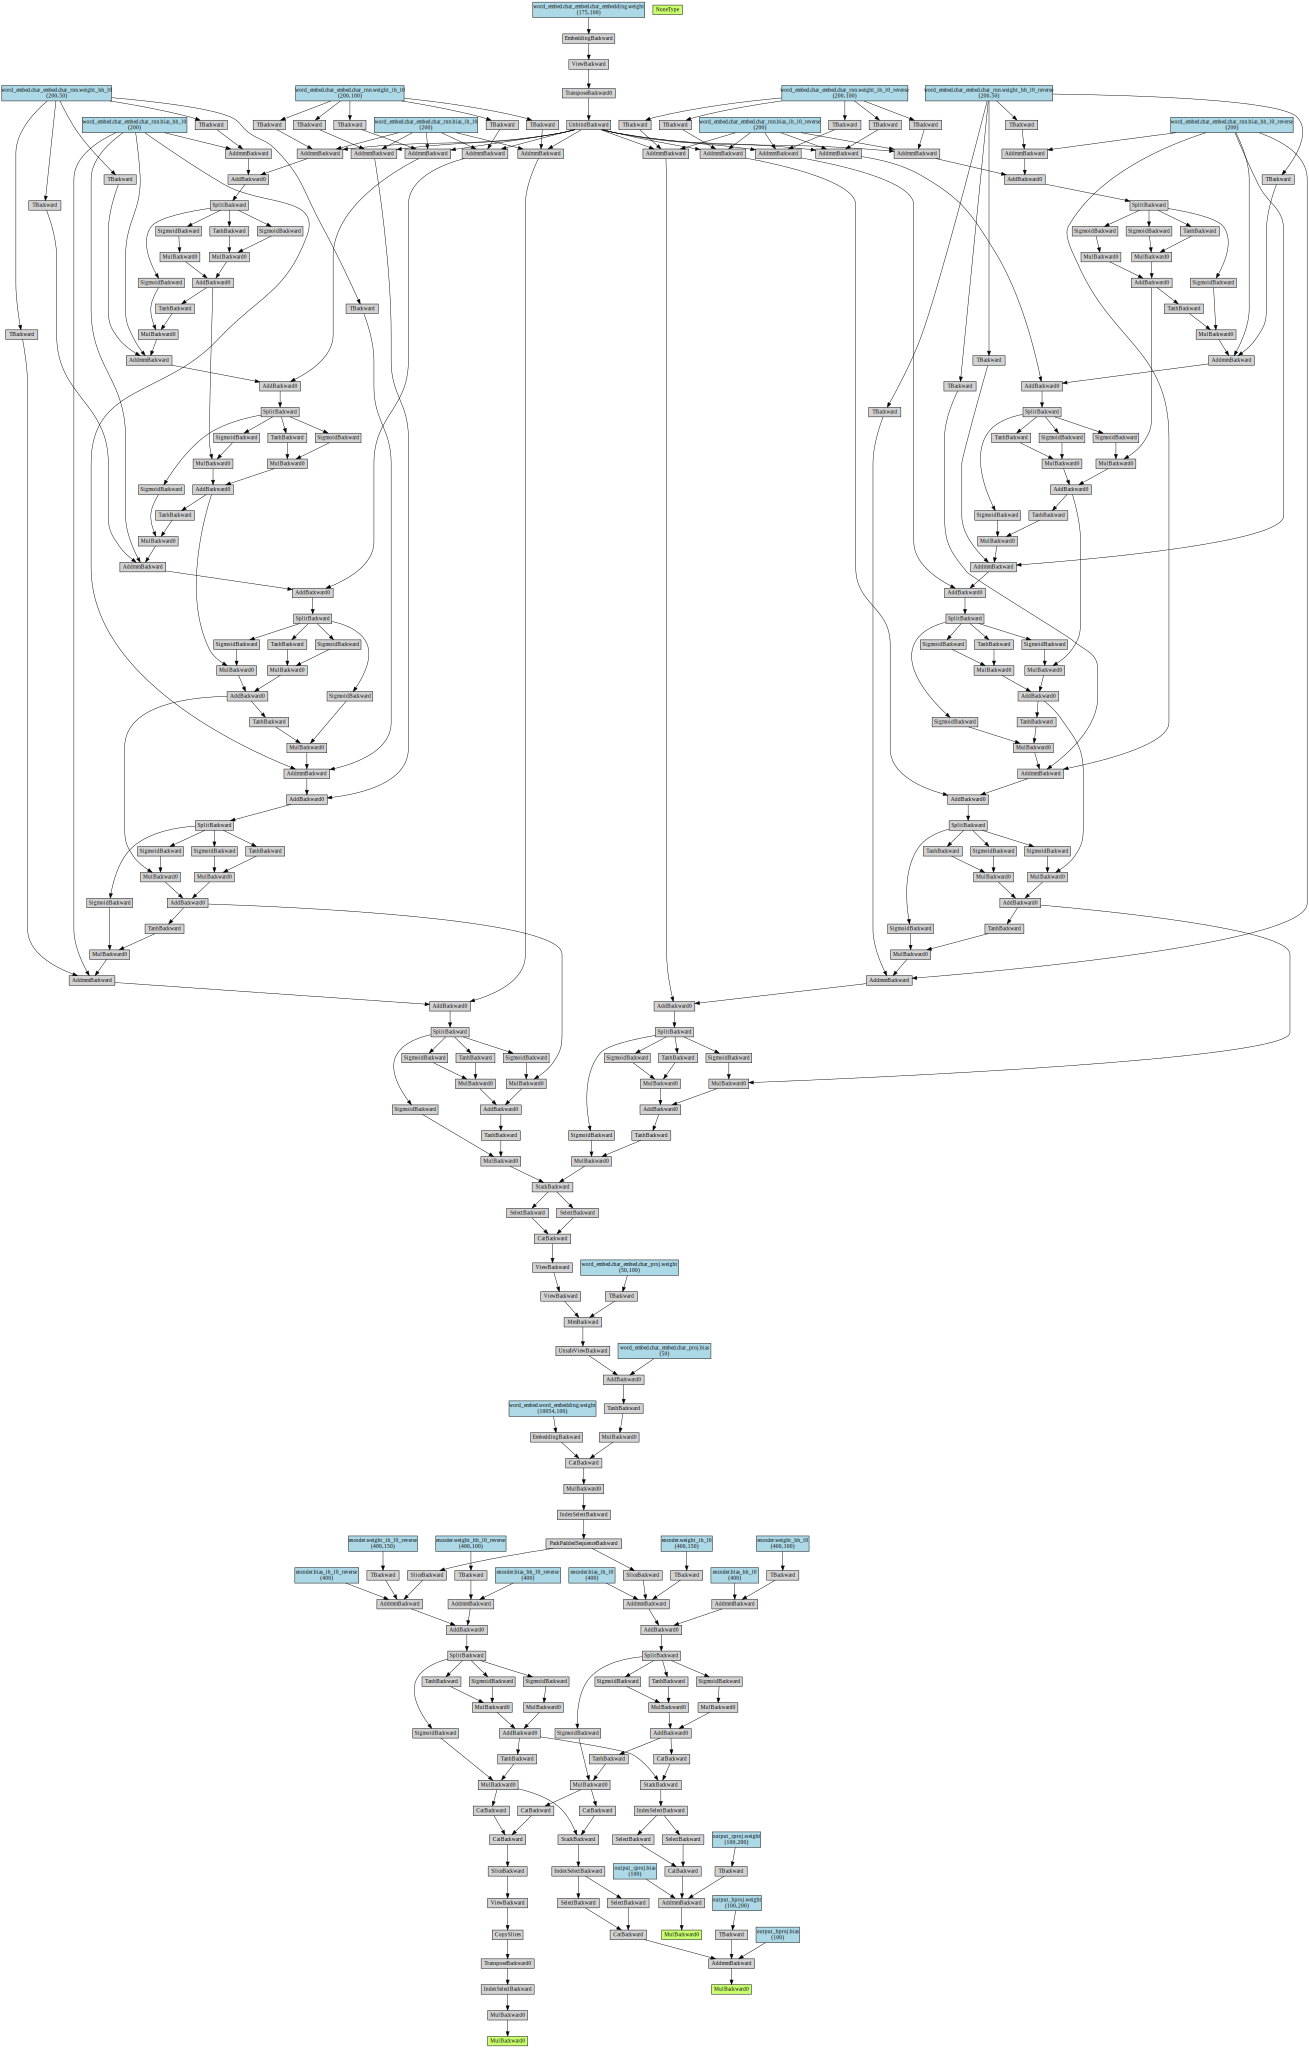

In [6]:
input_word_ids = torch.ones([10, 10], dtype=torch.long)
input_seq_lens = torch.ones([10], dtype=torch.long)
input_seq_mask = torch.ones([10, 10], dtype=torch.long)
input_char_ids = torch.ones([10, 10, 5], dtype=torch.long)
input_word_lens = torch.ones([10, 10], dtype=torch.long)

make_dot(reg_model.des_encoder(input_word_ids, 
                               input_seq_lens, 
                               input_seq_mask, 
                               input_char_ids, 
                               input_word_lens), 
         params=dict(reg_model.des_encoder.named_parameters()))